# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

# Data loading without Data Augmentation:

In [2]:
train_dir = "./SceneClassificationData/seg_train/"
test_dir = "./SceneClassificationData/seg_test/seg_test/"
valid_dir = "./SceneClassificationData/seg_validation/"

train_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)
valid_datagen = ImageDataGenerator (rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (60, 60),
    color_mode='rgb',
    batch_size=20, class_mode='categorical')

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size= (60, 60),
    color_mode='rgb',
    batch_size=20, class_mode='categorical')

valid_generator = train_datagen.flow_from_directory(
    valid_dir,
    target_size= (60, 60),
    color_mode='rgb',
    batch_size=20, class_mode='categorical')


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [3]:
first_obj = train_generator.__next__()
print(first_obj[0].shape)
print(first_obj[1].shape)


(20, 60, 60, 3)
(20, 6)


we have checked sample sizes and labels. the sizes are correct and we shall proceed

# CNN

In [6]:
def create_model():
  model = models.Sequential() 
  
  model.add(layers.Conv2D(20, (3,3), activation='relu', input_shape=(60,60,3)))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Conv2D(40, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Conv2D(80, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Conv2D(120, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(360, activation='relu'))
  model.add(Dropout(0.2))
  model.add(layers.Dense(6, activation='sigmoid'))


  model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [15]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 58, 58, 20)        560       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 29, 29, 20)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 27, 27, 40)        7240      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 40)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 80)        28880     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 80)        

note that, before running fit, we should create the model, even if it already exists.

### Training:

In [16]:
epochs = 60
history = model.fit(train_generator,
                    steps_per_epoch=40,
                    epochs=epochs,
                    validation_data=valid_generator,
                    validation_steps=40)

Epoch 1/60
40/40 [==============================] - 2s 35ms/step - loss: 1.6221 - accuracy: 0.3037 - val_loss: 1.4670 - val_accuracy: 0.3525
Epoch 2/60
40/40 [==============================] - 1s 30ms/step - loss: 1.4319 - accuracy: 0.3787 - val_loss: 1.3531 - val_accuracy: 0.4212
Epoch 3/60
40/40 [==============================] - 1s 30ms/step - loss: 1.3271 - accuracy: 0.4087 - val_loss: 1.2419 - val_accuracy: 0.4800
Epoch 4/60
40/40 [==============================] - 1s 31ms/step - loss: 1.2926 - accuracy: 0.4700 - val_loss: 1.1853 - val_accuracy: 0.5087
Epoch 5/60
40/40 [==============================] - 1s 30ms/step - loss: 1.2709 - accuracy: 0.4612 - val_loss: 1.2263 - val_accuracy: 0.4600
Epoch 6/60
40/40 [==============================] - 1s 31ms/step - loss: 1.1978 - accuracy: 0.5000 - val_loss: 1.2020 - val_accuracy: 0.4750
Epoch 7/60
40/40 [==============================] - 1s 30ms/step - loss: 1.1289 - accuracy: 0.5325 - val_loss: 1.1692 - val_accuracy: 0.5462
Epoch 8/60
40

In [17]:
model.save('q2_1.h5')
history_dic = history.history

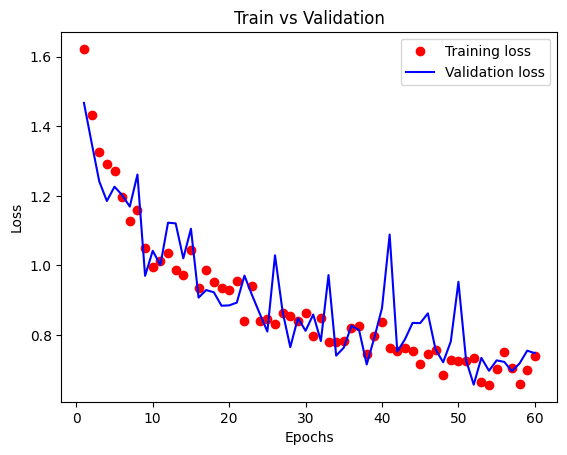

In [18]:
plt.plot(np.arange(1, epochs + 1), history_dic['loss'], 'ro', label = "Training loss")
plt.plot(np.arange(1, epochs + 1), history_dic['val_loss'], 'b', label = "Validation loss")
plt.title("Train vs Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

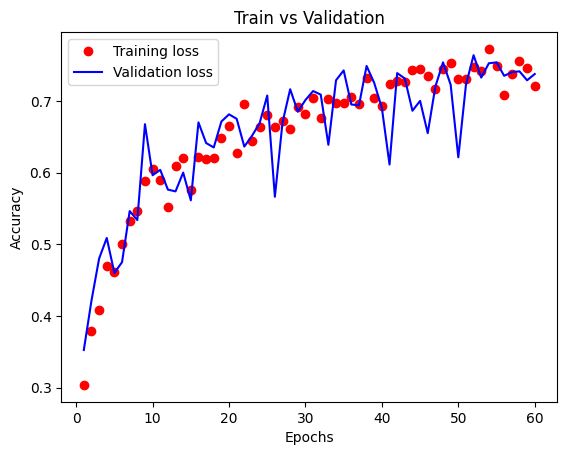

In [19]:
plt.plot(np.arange(1, epochs + 1), history_dic['accuracy'], 'ro', label = "Training loss")
plt.plot(np.arange(1, epochs + 1), history_dic['val_accuracy'], 'b', label = "Validation loss")
plt.title("Train vs Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

we have run the code with steps_per_epoch=20 before, and due to high fluctuations, we have changed it to 40. the results are much better

### epochs:
it seems 35 epochs are promissed to show better results

In [20]:
mse, mae = model.evaluate(test_generator)
print(f"MSE = {mse}, MAE: {mae}")

150/150 [==============================] - 2s 11ms/step - loss: 0.7290 - accuracy: 0.7387
MSE = 0.7289703488349915, MAE: 0.7386666536331177


## loading unseen data and evaluating with unseen data

In [11]:
# Training again with fixed number of epochs
model = create_model()
epochs = 35
history = model.fit(train_generator,
                    steps_per_epoch=60,
                    epochs=epochs,
                    validation_data=valid_generator,
                    validation_steps=30)

Epoch 1/35
60/60 [==============================] - 2s 25ms/step - loss: 1.6005 - accuracy: 0.3017 - val_loss: 1.4217 - val_accuracy: 0.4200
Epoch 2/35
60/60 [==============================] - 1s 23ms/step - loss: 1.3732 - accuracy: 0.4108 - val_loss: 1.2837 - val_accuracy: 0.4417
Epoch 3/35
60/60 [==============================] - 1s 23ms/step - loss: 1.2546 - accuracy: 0.4775 - val_loss: 1.2345 - val_accuracy: 0.4867
Epoch 4/35
60/60 [==============================] - 1s 23ms/step - loss: 1.1198 - accuracy: 0.5425 - val_loss: 1.0742 - val_accuracy: 0.6033
Epoch 5/35
60/60 [==============================] - 1s 23ms/step - loss: 1.0879 - accuracy: 0.5425 - val_loss: 1.0553 - val_accuracy: 0.5733
Epoch 6/35
60/60 [==============================] - 1s 23ms/step - loss: 1.0276 - accuracy: 0.5750 - val_loss: 1.0230 - val_accuracy: 0.5800
Epoch 7/35
60/60 [==============================] - 1s 23ms/step - loss: 1.0226 - accuracy: 0.5992 - val_loss: 1.0927 - val_accuracy: 0.5700
Epoch 8/35
60

In [30]:
predict_dir = './SceneClassificationData/seg_pred/'
predict_datagen = ImageDataGenerator (rescale=1./255)

predict_generator = predict_datagen.flow_from_directory(
    predict_dir,
    target_size= (60, 60),
    color_mode='rgb',
    batch_size=20, class_mode='categorical')

predict = model.predict(predict_generator)
predict = np.argmax(predict, axis = 1)

Found 7301 images belonging to 1 classes.
366/366 [==============================] - 4s 10ms/step


# Loading Data with Augmentation

In [13]:
train_datagen = ImageDataGenerator (rescale=1./255,
                                    rotation_range = 10,
                                    width_shift_range=0.3,
                                    zoom_range=.3,
                                    brightness_range=[.2, .6],
                                    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (60, 60),
    color_mode='rgb',
    batch_size=20, class_mode='categorical')


Found 14034 images belonging to 6 classes.


In [21]:
model = create_model()
# Training
epochs = 60
history = model.fit(train_generator,
                    steps_per_epoch=40,
                    epochs=epochs,
                    validation_data=valid_generator,
                    validation_steps=40)

model.save('q2_1_E(Augmented).h5')
history_dic = history.history

Epoch 1/60
40/40 [==============================] - 2s 37ms/step - loss: 1.6966 - accuracy: 0.2500 - val_loss: 1.4923 - val_accuracy: 0.3300
Epoch 2/60
40/40 [==============================] - 1s 30ms/step - loss: 1.4940 - accuracy: 0.3650 - val_loss: 1.3713 - val_accuracy: 0.4400
Epoch 3/60
40/40 [==============================] - 1s 30ms/step - loss: 1.3284 - accuracy: 0.4412 - val_loss: 1.3492 - val_accuracy: 0.4287
Epoch 4/60
40/40 [==============================] - 1s 29ms/step - loss: 1.3221 - accuracy: 0.4262 - val_loss: 1.2704 - val_accuracy: 0.5000
Epoch 5/60
40/40 [==============================] - 1s 29ms/step - loss: 1.3014 - accuracy: 0.4637 - val_loss: 1.3232 - val_accuracy: 0.4500
Epoch 6/60
40/40 [==============================] - 1s 29ms/step - loss: 1.2070 - accuracy: 0.4988 - val_loss: 1.1748 - val_accuracy: 0.5112
Epoch 7/60
40/40 [==============================] - 1s 29ms/step - loss: 1.1816 - accuracy: 0.5325 - val_loss: 1.2593 - val_accuracy: 0.4950
Epoch 8/60
40

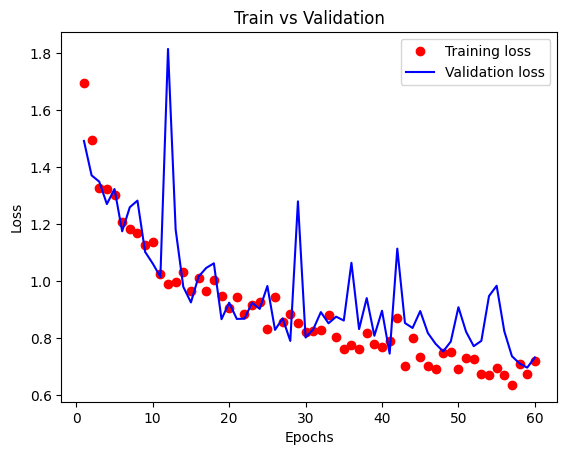

In [22]:
plt.plot(np.arange(1, epochs + 1), history_dic['loss'], 'ro', label = "Training loss")
plt.plot(np.arange(1, epochs + 1), history_dic['val_loss'], 'b', label = "Validation loss")
plt.title("Train vs Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

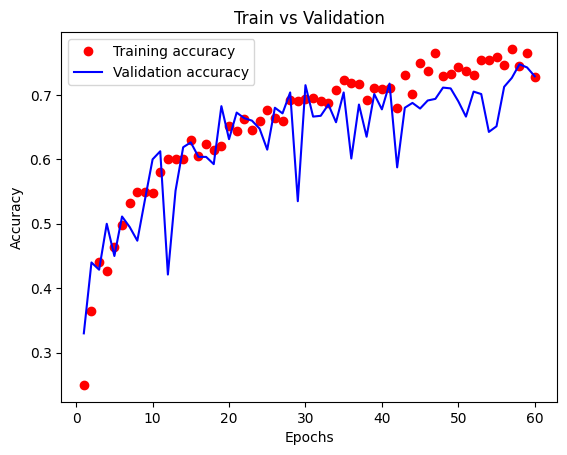

In [25]:
plt.plot(np.arange(1, epochs + 1), history_dic['accuracy'], 'ro', label = "Training accuracy")
plt.plot(np.arange(1, epochs + 1), history_dic['val_accuracy'], 'b', label = "Validation accuracy")
plt.title("Train vs Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### epochs:
epcoh 48 seems to be the best one

In [24]:
mse, mae = model.evaluate(test_generator)
print(f"MSE = {mse}, MAE: {mae}")

150/150 [==============================] - 2s 11ms/step - loss: 0.7326 - accuracy: 0.7297
MSE = 0.7326207756996155, MAE: 0.7296666502952576


# Part 2

In [33]:
def create_model():
  model = models.Sequential() 
  
  model.add(layers.Conv2D(32, (9,9), activation='relu', input_shape=(224, 224,3)))
  model.add(layers.MaxPooling2D((2,2), strides=2))

  model.add(layers.Conv2D(64, (5,5), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=2))

  model.add(layers.Conv2D(64, (5,5), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=2))

  model.add(layers.Flatten())
  model.add(layers.Dense(3, activation='relu'))
  model.add(layers.Dense(6, activation='sigmoid')) # output


  # Compilation
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [34]:
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 216, 216, 32)      7808      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 108, 108, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 104, 104, 64)      51264     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 52, 52, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 64)      